In [59]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
%matplotlib inline

In [61]:
import os

In [62]:
housing_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [63]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [64]:
#print the dimension/shape of the dataframe
housing_df.shape

(1460, 81)

In [65]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [66]:
#removing the ID column
housing_df.drop("Id",axis = 1 ,inplace = True)

<Axes: >

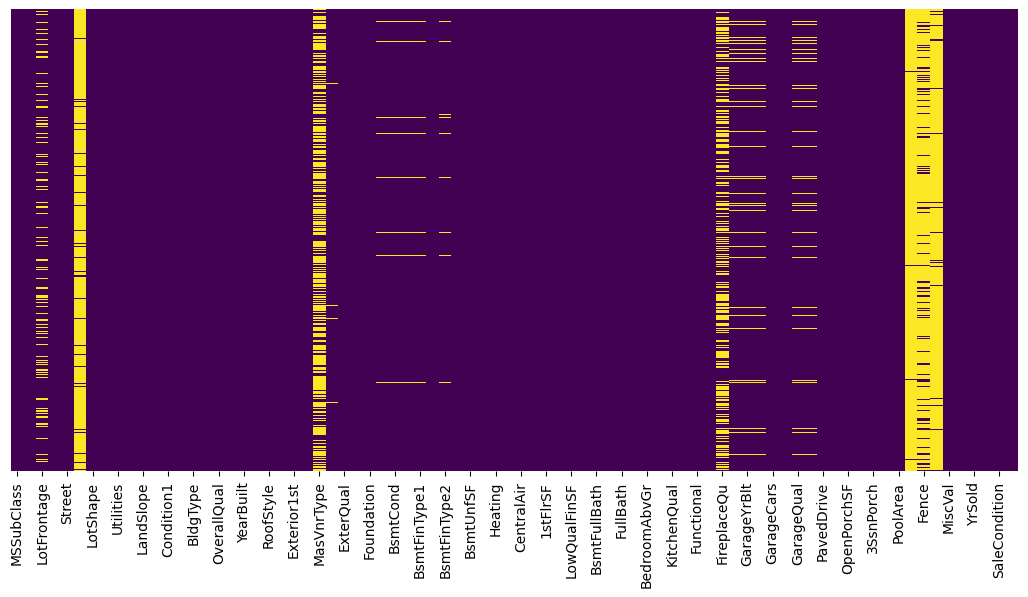

In [67]:
plt.figure(figsize=(13,6))
sns.heatmap(housing_df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [68]:
housing_df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [69]:
null_df = housing_df.isnull().sum()*100/len(housing_df)

In [70]:
null_df

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [71]:
#print columns that have values > 25%
#this shows the less influential variables 
null_df[null_df.values > 25].index

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [72]:
housing_df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis =1,
               inplace = True)

In [73]:
null_df[(null_df.values <= 25) & (null_df.values > 0)]

LotFrontage     17.739726
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [74]:
housing_df['LotFrontage'].median()

69.0

In [75]:
#since there are still quite a bit of missing vaues in lotfrontage 
#we can fill it in with the median value 

housing_df['LotFrontage'].fillna(69.0,inplace = True)

In [76]:
#returning location where msvnrarea is null as a data frame but for only
#MasVnrArea','MasVnrType columns

housing_df.loc[housing_df.MasVnrArea.isnull(),['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [77]:
housing_df[['MasVnrArea','MasVnrType']].head()

,MasVnrArea,MasVnrType
0,196.0,BrkFace
1,0.0,NaN
2,162.0,BrkFace
3,0.0,NaN
4,350.0,BrkFace


In [78]:
#now that we know where the area is null the type is also null
#fill in the values 
housing_df.MasVnrArea.fillna(0,inplace = True)
housing_df.MasVnrType.fillna('None', inplace = True)

In [79]:
housing_df[['GarageYrBlt','GarageFinish','GarageQual','GarageCond']]

,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,2003.0,RFn,TA,TA
1,1976.0,RFn,TA,TA
2,2001.0,RFn,TA,TA
3,1998.0,Unf,TA,TA
4,2000.0,RFn,TA,TA
...,...,...,...,...
1455,1999.0,RFn,TA,TA
1456,1978.0,Unf,TA,TA
1457,1941.0,RFn,TA,TA
1458,1950.0,Unf,TA,TA


In [80]:
housing_df.loc[housing_df.GarageType.isnull(),['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN
1407,NaN,NaN,NaN,NaN,NaN
1449,NaN,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN,NaN


Considering that the garage is empty for these houses 

In [81]:
housing_df.GarageType.fillna('None', inplace=True)
housing_df.GarageYrBlt.fillna(0, inplace=True)
housing_df.GarageFinish.fillna('None', inplace=True)
housing_df.GarageQual.fillna('None', inplace=True)
housing_df.GarageCond.fillna('None', inplace=True)

In [82]:
#removing all rows with Na, NaN , null values
housing_df.dropna(inplace = True)

In [83]:
#check if there are any na values left 
#should return an empty series 
null_df = housing_df.isnull().sum()
null_df[null_df.values > 0]

Series([], dtype: int64)

<Axes: >

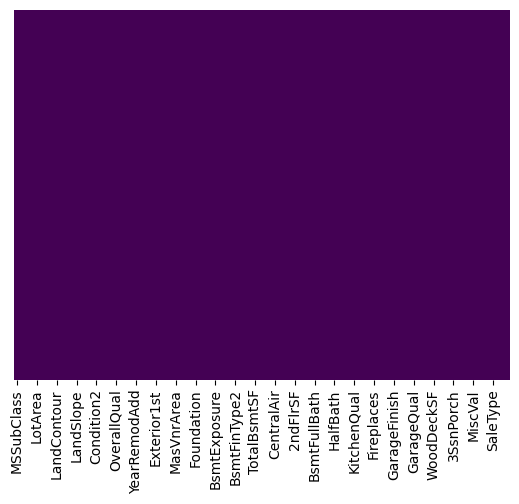

In [84]:
sns.heatmap(housing_df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [85]:
#we can ask for a statistical summary of each column and specify
#the percentile
#Adding .T allows us to view the columns as rows and vice versa 
housing_df.describe([0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]).T


,count,mean,std,min,0%,1%,5%,10%,25%,50%,75%,90%,95%,99%,100%,max
MSSubClass,1420.0,56.799296,42.268545,20.0,20.0,20.00,20.00,20.0,20.00,50.0,70.00,120.0,160.00,190.00,190.0,190.0
LotFrontage,1420.0,69.952817,22.276497,21.0,21.0,21.00,35.00,48.0,60.00,69.0,79.00,92.0,105.00,137.81,313.0,313.0
LotArea,1420.0,10546.640845,10104.687606,1300.0,1300.0,1680.00,3228.30,4992.8,7583.00,9500.0,11628.50,14442.8,17426.85,38609.24,215245.0,215245.0
OverallQual,1420.0,6.145070,1.359361,1.0,1.0,3.00,4.00,5.0,5.00,6.0,7.00,8.0,8.00,10.00,10.0,10.0
OverallCond,1420.0,5.591549,1.110238,1.0,1.0,3.00,4.00,5.0,5.00,5.0,6.00,7.0,8.00,9.00,9.0,9.0
YearBuilt,1420.0,1971.582394,30.378484,1872.0,1872.0,1898.38,1916.00,1924.0,1954.00,1973.5,2001.00,2006.0,2007.00,2009.00,2010.0,2010.0
YearRemodAdd,1420.0,1985.281690,20.454376,1950.0,1950.0,1950.00,1950.00,1950.0,1968.00,1994.0,2004.00,2007.0,2007.00,2009.00,2010.0,2010.0
MasVnrArea,1420.0,104.773239,181.996947,0.0,0.0,0.00,0.00,0.0,0.00,0.0,168.00,336.0,456.00,794.48,1600.0,1600.0
BsmtFinSF1,1420.0,455.345070,456.088615,0.0,0.0,0.00,0.00,0.0,0.00,400.0,725.00,1074.4,1274.15,1572.81,5644.0,5644.0
BsmtFinSF2,1420.0,47.523239,162.988333,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,123.2,400.55,837.58,1474.0,1474.0


### To remove outliers which are +-3 standard deviations away from the mean you would have to get rid of anything above the 99 percentile since we only have positive values 

In [86]:
#excluded object datatypes and printed, assigned a list of non- object
#columns
number_cols = housing_df.select_dtypes(exclude= 'object').columns
number_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [87]:
np.percentile(housing_df['MSSubClass'],99)

190.0

### In order to exclude anything higher than 99% of each int/float column then what we have to do is change the value to be the 99%tile value using a for loop 

In [88]:
type(number_cols)

pandas.core.indexes.base.Index

In [89]:
num_cols = list(number_cols)

### since the variable above is an index not a list to iterate through we have to convert it to a list when we are calling the for loop

In [90]:
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [91]:
for i in num_cols:
    housing_df.loc[housing_df[i] >= np.percentile(housing_df[i], 99),i] = np.percentile(housing_df[i], 99)
    

In [92]:
housing_df[num_cols].describe([0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]).T

,count,mean,std,min,0%,1%,5%,10%,25%,50%,75%,90%,95%,99%,100%,max
MSSubClass,1420.0,56.799296,42.268545,20.0,20.0,20.00,20.00,20.0,20.00,50.0,70.00,120.0,160.00,190.0000,190.00,190.00
LotFrontage,1420.0,69.541655,19.804766,21.0,21.0,21.00,35.00,48.0,60.00,69.0,79.00,92.0,105.00,137.6561,137.81,137.81
LotArea,1420.0,10090.120141,5164.705843,1300.0,1300.0,1680.00,3228.30,4992.8,7583.00,9500.0,11628.50,14442.8,17426.85,38208.4844,38609.24,38609.24
OverallQual,1420.0,6.145070,1.359361,1.0,1.0,3.00,4.00,5.0,5.00,6.0,7.00,8.0,8.00,10.0000,10.00,10.00
OverallCond,1420.0,5.591549,1.110238,1.0,1.0,3.00,4.00,5.0,5.00,5.0,6.00,7.0,8.00,9.0000,9.00,9.00
YearBuilt,1420.0,1971.581690,30.377604,1872.0,1872.0,1898.38,1916.00,1924.0,1954.00,1973.5,2001.00,2006.0,2007.00,2009.0000,2009.00,2009.00
YearRemodAdd,1420.0,1985.277465,20.449368,1950.0,1950.0,1950.00,1950.00,1950.0,1968.00,1994.0,2004.00,2007.0,2007.00,2009.0000,2009.00,2009.00
MasVnrArea,1420.0,102.233239,168.872664,0.0,0.0,0.00,0.00,0.0,0.00,0.0,168.00,336.0,456.00,793.2488,794.48,794.48
BsmtFinSF1,1420.0,450.095880,428.405742,0.0,0.0,0.00,0.00,0.0,0.00,400.0,725.00,1074.4,1274.15,1572.6561,1572.81,1572.81
BsmtFinSF2,1420.0,45.394155,150.113930,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,123.2,400.55,834.8098,837.58,837.58


- We can now see that the 99%, 100%tile and max are all the same eliminating the oultiers 

- Also pool area has zero as the mean so lets get rid of it 

In [93]:
housing_df.drop('PoolArea',axis = 1, inplace = True)
num_cols = housing_df.select_dtypes(exclude='object').columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

In [94]:
#categorical columns 

cat_cols = housing_df.select_dtypes(include='object').columns
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [95]:
#here we want to print out the value count in eah categorical column

# normalize used to get the percentage 
for i in list(cat_cols):
    print(housing_df[i].value_counts(normalize=True))
    print('**********************************')
    

MSZoning
RL         0.785915
RM         0.150704
FV         0.045775
RH         0.010563
C (all)    0.007042
Name: proportion, dtype: float64
**********************************
Street
Pave    0.995775
Grvl    0.004225
Name: proportion, dtype: float64
**********************************
LotShape
Reg    0.628169
IR1    0.336620
IR2    0.028169
IR3    0.007042
Name: proportion, dtype: float64
**********************************
LandContour
Lvl    0.897887
Bnk    0.042958
HLS    0.035211
Low    0.023944
Name: proportion, dtype: float64
**********************************
Utilities
AllPub    0.999296
NoSeWa    0.000704
Name: proportion, dtype: float64
**********************************
LotConfig
Inside     0.719014
Corner     0.180986
CulDSac    0.064789
FR2        0.032394
FR3        0.002817
Name: proportion, dtype: float64
**********************************
LandSlope
Gtl    0.945775
Mod    0.045070
Sev    0.009155
Name: proportion, dtype: float64
**********************************
Neighborh

Look through the value count and if you see maybe two categories or few where theres big disparity 
delete that because it wont have a big influence on price 

In [96]:
drop_cols = ['Street','Utilities','LandSlope','Condition2','RoofMatl','Heating','CentralAir','Electrical','Functional',
             'PavedDrive','GarageCond','GarageQual','LandContour']

In [97]:
housing_df.drop(columns=drop_cols, inplace=True)

In [98]:
cat_cols = housing_df.select_dtypes(include='object').columns

In [99]:
cat_cols

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'GarageType', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [100]:
housing_df.MSZoning = housing_df.MSZoning.apply(lambda x: 'other' if x not in ('RL','RM') else x)
housing_df.LotShape = housing_df.LotShape.apply(lambda x: 'other' if x not in ('Reg','IR1') else x)
housing_df.LotConfig = housing_df.LotConfig.apply(lambda x: 'other' if x not in ('Inside','Corner') else x)
housing_df.Condition1 = housing_df.Condition1.apply(lambda x: 'other' if x not in ('Norm') else x)
housing_df.BldgType = housing_df.BldgType.apply(lambda x: 'other' if x not in ('1Fam') else x)
housing_df.HouseStyle = housing_df.HouseStyle.apply(lambda x: 'other' if x not in ('1Story','2Story','1.5Fin') else x)
housing_df.RoofStyle = housing_df.RoofStyle.apply(lambda x: 'other' if x not in ('Gable','Hip','1.5Fin') else x)
housing_df.RoofStyle = housing_df.RoofStyle.apply(lambda x: 'other' if x not in ('Gable','Hip','1.5Fin') else x)
housing_df.RoofStyle = housing_df.RoofStyle.apply(lambda x: 'other' if x not in ('Gable','Hip','1.5Fin') else x)
housing_df.Exterior1st = housing_df.Exterior1st.apply(lambda x: 'other' if x not in ('VinylSd','HdBoard','MetalSd','Wd Sdng') else x)
housing_df.Exterior2nd = housing_df.Exterior2nd.apply(lambda x: 'other' if x not in ('VinylSd','HdBoard','MetalSd','Wd Sdng') else x)
housing_df.MasVnrType = housing_df.MasVnrType.apply(lambda x: 'other' if x not in ('None','none','BrkFace') else x)
housing_df.ExterQual = housing_df.ExterQual.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_df.ExterCond = housing_df.ExterCond.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_df.Foundation = housing_df.Foundation.apply(lambda x: 'other' if x not in ('PConc','CBlock','BrkTil') else x)
housing_df.BsmtQual = housing_df.BsmtQual.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_df.BsmtQual = housing_df.BsmtQual.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_df.BsmtExposure = housing_df.BsmtExposure.apply(lambda x: 'other' if x not in ('No','Av') else x)
housing_df.BsmtFinType1 = housing_df.BsmtFinType1.apply(lambda x: 'other' if x not in ('Unf','GLQ','ALQ','BLQ') else x)
housing_df.BsmtFinType2 = housing_df.BsmtFinType2.apply(lambda x: 'other' if x not in ('Unf') else x)
housing_df.HeatingQC = housing_df.HeatingQC.apply(lambda x: 'other' if x not in ('Ex','TA') else x)
housing_df.KitchenQual = housing_df.KitchenQual.apply(lambda x: 'other' if x not in ('TA','Gd') else x)
housing_df.GarageType = housing_df.GarageType.apply(lambda x: 'other' if x not in ('Attchd','Detchd') else x)
housing_df.GarageType = housing_df.GarageType.apply(lambda x: 'other' if x not in ('Attchd','Detchd') else x)
housing_df.SaleType = housing_df.SaleType.apply(lambda x: 'other' if x not in ('WD') else x)
housing_df.SaleCondition = housing_df.SaleCondition.apply(lambda x: 'other' if x not in ('Normal') else x)

In [101]:
def year_to_cat(x):
    if x==0:
        return 'None'
    elif x < 1930:
        return 'lt_1930'
    elif x > 1930 and x <= 1960:
        return 'btw_30_60'
    elif x > 1960 and x <= 1990:
        return 'btw_60_90'
    elif x > 1990:
        return 'gt_90'


In [102]:
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].apply(lambda x: year_to_cat(x))

In [103]:
cat_cols = housing_df.select_dtypes(include='object').columns
num_cols = housing_df.select_dtypes(exclude='object').columns

In [104]:
cat_cols

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [105]:
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

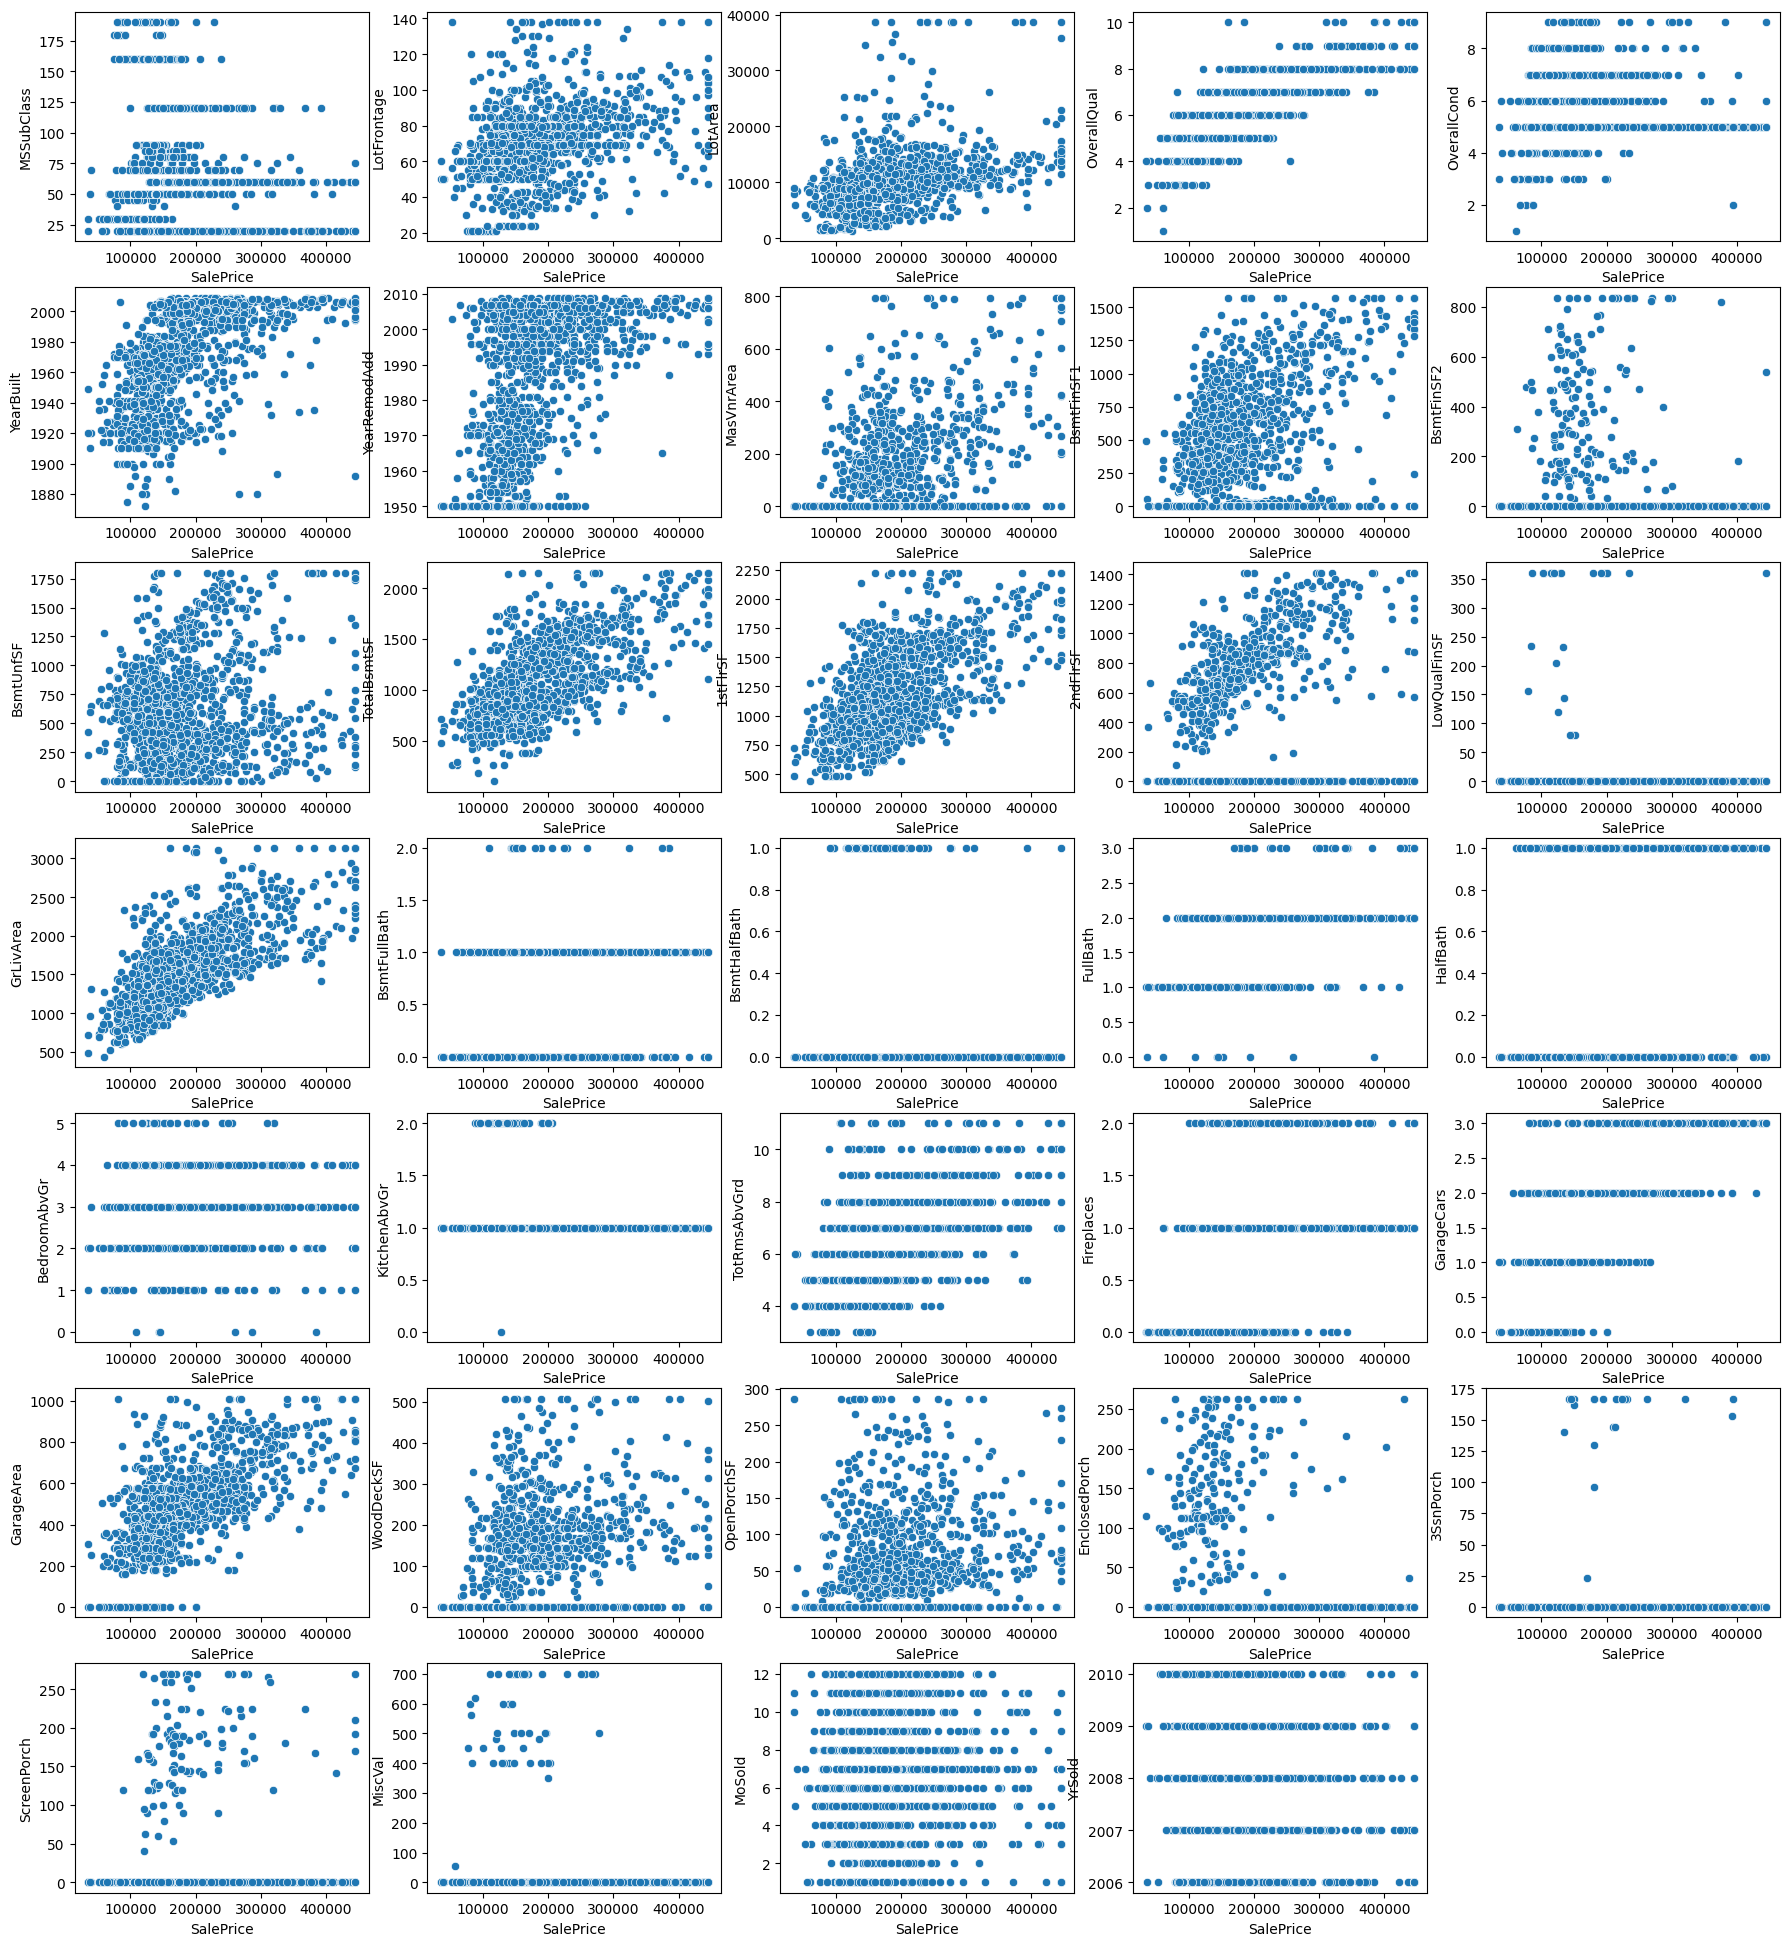

In [106]:
plt.figure(figsize=(22,28))
for i,j in zip(num_cols[:-1], range(len(num_cols[:-1]))):
    plt.subplot(8,5,j+1)
    sns.scatterplot(data=housing_df, x='SalePrice', y=i)

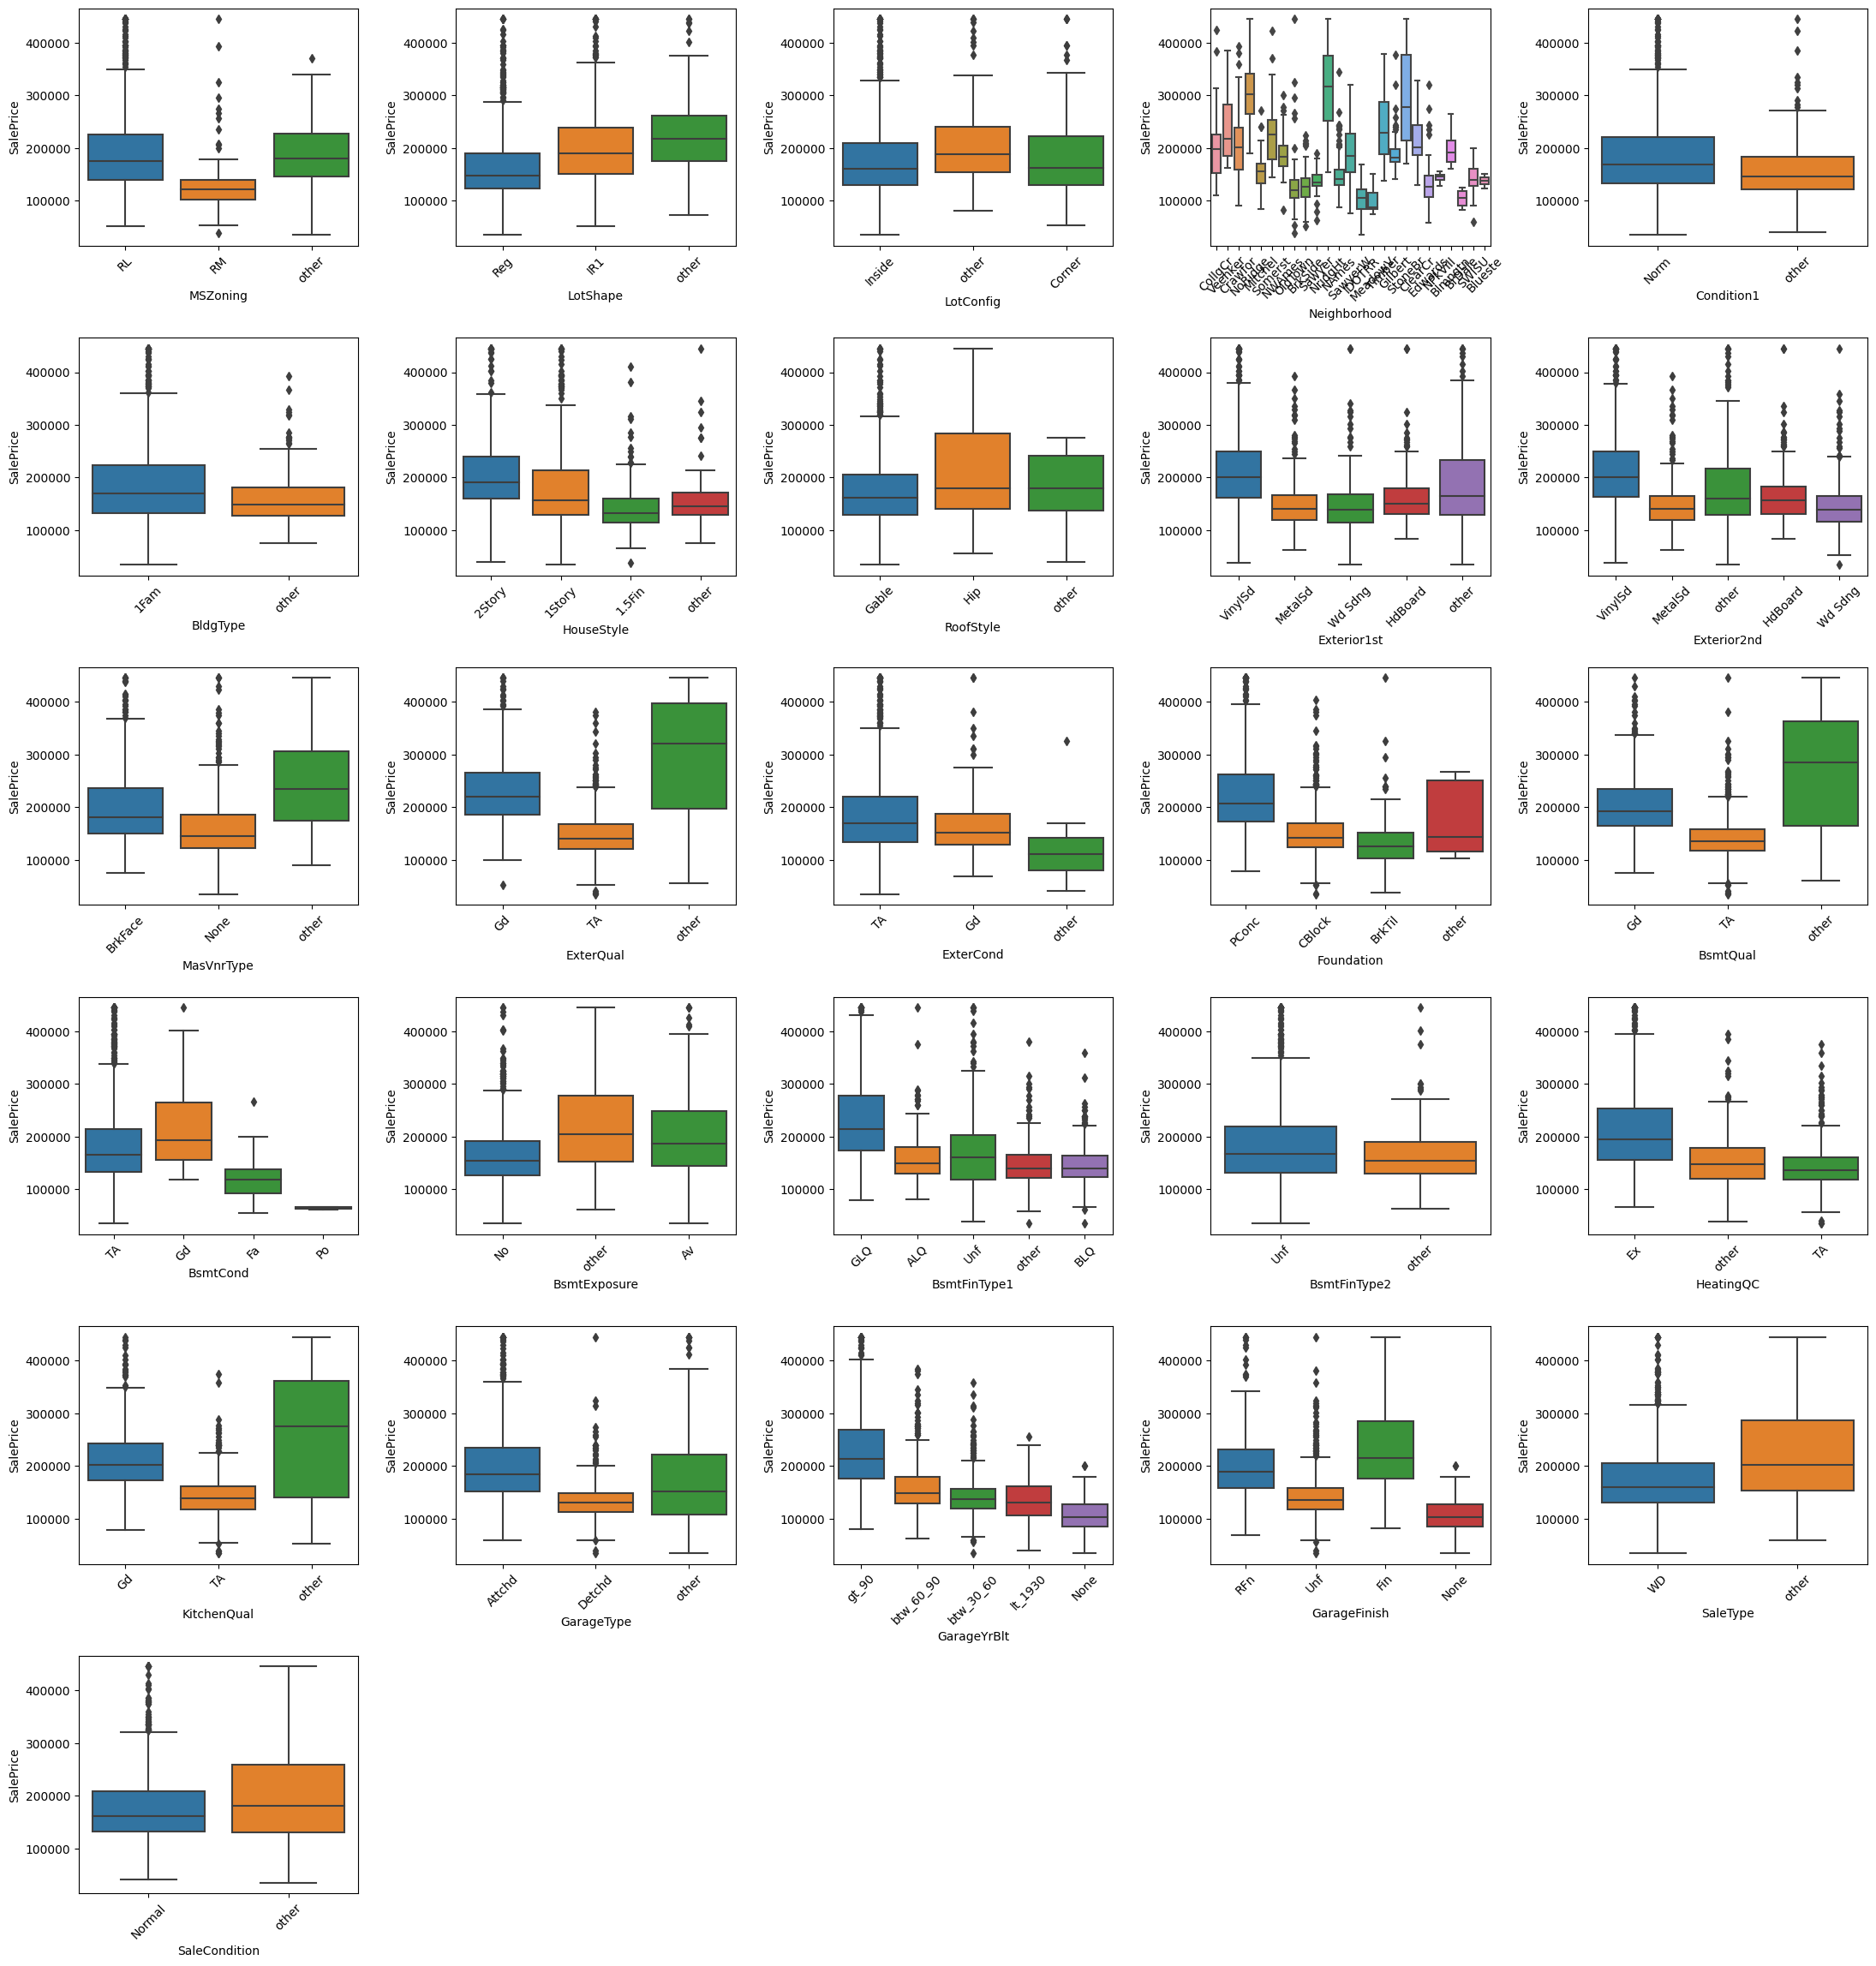

In [107]:
plt.figure(figsize=(22,30))
for i,j in zip(cat_cols, range(len(cat_cols))):
    plt.subplot(8,5,j+1)
    plt.xticks(rotation=45)
    sns.boxplot(data=housing_df, y='SalePrice', x=i)
plt.tight_layout()

<Axes: >

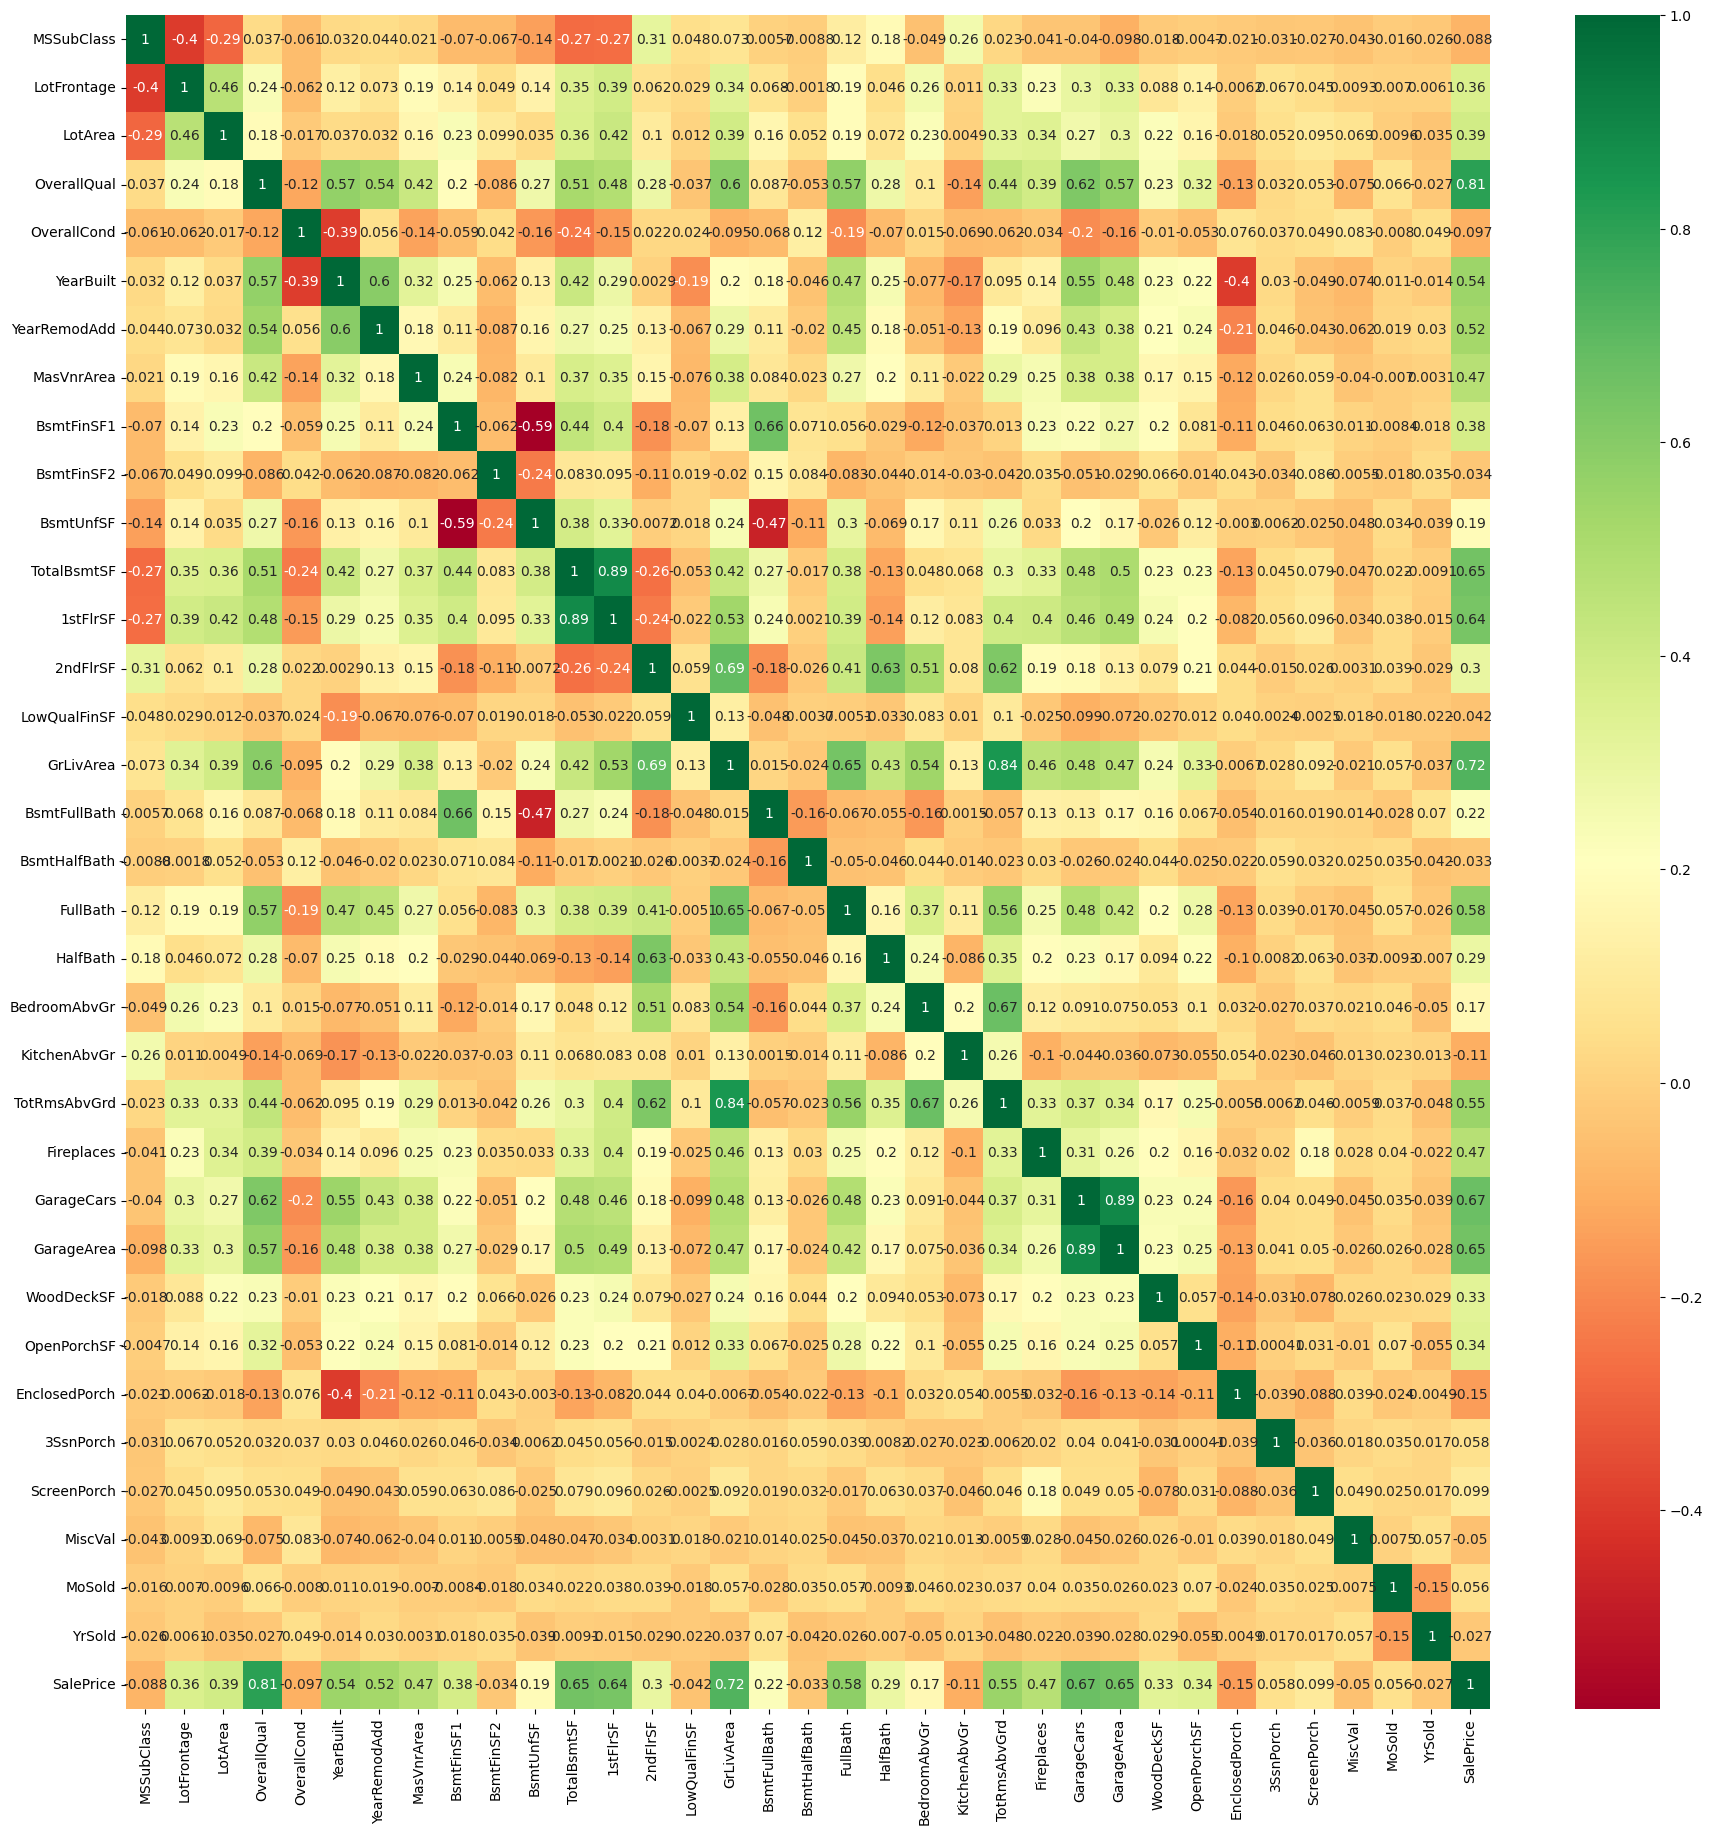

In [108]:
plt.figure(figsize=(22,22))
sns.heatmap(housing_df[num_cols].corr(),cmap='RdYlGn',annot=True)

In [109]:
housing_df.drop(columns='Neighborhood',inplace=True)
housing_df.reset_index(drop=True,inplace=True)

In [110]:
cat_cols = housing_df.select_dtypes(include='object').columns

In [111]:
print(num_cols,cat_cols)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object') Index(['MSZoning', 'LotShape', 'LotConfig', 'Condition1', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [112]:
#lets create a new data frame with only dummmy categorical data and num columns 

dummies_df = housing_df[num_cols]

for i in cat_cols:
    temp = pd.get_dummies(housing_df[i],drop_first=True)
    dummies_df = pd.concat([dummies_df,temp],axis=1)

dummies_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,other,btw_30_60,btw_60_90,gt_90,lt_1930,None,RFn,Unf,other,other
0,60,65.0,8450.0,7,5,2003,2003,196.0,706.0,0.0,...,False,False,False,True,False,False,True,False,False,False
1,20,80.0,9600.0,6,8,1976,1976,0.0,978.0,0.0,...,False,False,True,False,False,False,True,False,False,False
2,60,68.0,11250.0,7,5,2001,2002,162.0,486.0,0.0,...,False,False,False,True,False,False,True,False,False,False
3,70,60.0,9550.0,7,5,1915,1970,0.0,216.0,0.0,...,False,False,False,True,False,False,False,True,False,True
4,60,84.0,14260.0,8,5,2000,2000,350.0,655.0,0.0,...,False,False,False,True,False,False,True,False,False,False


In [113]:
dummies_df.shape

(1420, 92)

## Lets split our data , Train our linear model , predict house sales and Evaluate model

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X = dummies_df.drop(columns='SalePrice')

In [116]:
y = dummies_df['SalePrice']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
lm = LinearRegression()

In [120]:
lm.fit(X_train,y_train)

LinearRegression()

In [121]:
#PREDICTIONS 
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

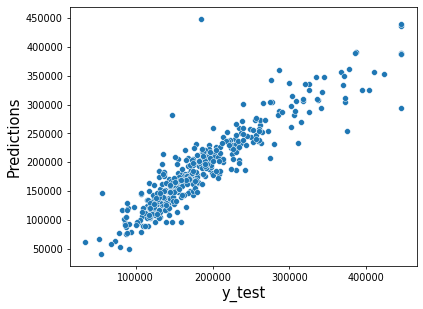

In [122]:
plt.figure(dpi=70)
g=sns.scatterplot(x=y_test,y=predictions)
g.set_xlabel('y_test',fontdict={'size':15})
g.set_ylabel('Predictions',fontdict={'size':15})

/Users/obinnadinneya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


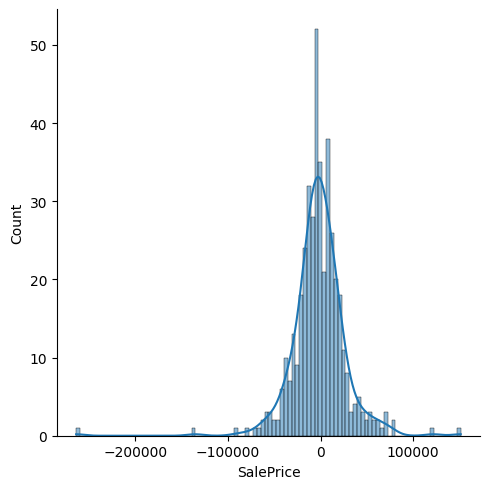

In [123]:
sns.displot(y_test-predictions,bins=100,kde=True,)

In [124]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test,predictions)

MSE = metrics.mean_squared_error(y_test,predictions)

RMSE = np.sqrt(MSE)

R2 = metrics.r2_score(y_test,predictions)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R^2: {R2}')

MAE: 19252.91620307908
MSE: 877221390.2127147
RMSE: 29617.92346219962
R^2: 0.8408386586699157


Average Saleprice = $182000

In [125]:
cdf = pd.DataFrame(data=lm.coef_,index=X.columns,columns=['Coefficients'])

In [126]:
cdf

,Coefficients
MSSubClass,32.043316
LotFrontage,-85.282548
LotArea,0.709214
OverallQual,10270.092687
OverallCond,7345.520653
...,...
None,-2492.790736
RFn,-1923.756048
Unf,-475.088697
other,9100.029610


In [127]:
dummies_df.shape

(1420, 92)

In [128]:
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Condition1,BldgType,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Reg,Inside,Norm,1Fam,2Story,7,...,61.0,0.00,0.0,0.0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600.0,Reg,other,other,1Fam,1Story,6,...,0.0,0.00,0.0,0.0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250.0,IR1,Inside,Norm,1Fam,2Story,7,...,42.0,0.00,0.0,0.0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550.0,IR1,Corner,Norm,1Fam,2Story,7,...,35.0,263.05,0.0,0.0,0,2,2006,WD,other,140000.0
4,60,RL,84.0,14260.0,IR1,other,Norm,1Fam,2Story,8,...,84.0,0.00,0.0,0.0,0,12,2008,WD,Normal,250000.0


In [129]:
num_cols = num_cols.drop('SalePrice')

In [130]:
#try some PCA PRINCIPLE CONCEPT 
from sklearn.preprocessing import StandardScaler

In [131]:
scaler = StandardScaler()

In [132]:
scaler.fit(housing_df[num_cols])

StandardScaler()

In [133]:
scaled_numdata = scaler.transform(housing_df[num_cols])

In [134]:
scaled_numdata

array([[ 0.07574975, -0.2294021 , -0.317675  , ..., -0.18262048,
        -1.59623017,  0.14339689],
       [-0.87091383,  0.52825816, -0.09493141, ..., -0.18262048,
        -0.48964912, -0.61076451],
       [ 0.07574975, -0.07787005,  0.22465723, ..., -0.18262048,
         0.98579227,  0.14339689],
       ...,
       [ 0.31241565, -0.17889141, -0.20301048, ...,  6.65601563,
        -0.48964912,  1.65171968],
       [-0.87091383, -0.07787005, -0.07226967, ..., -0.18262048,
        -0.85850947,  1.65171968],
       [-0.87091383,  0.27570474, -0.02965785, ..., -0.18262048,
        -0.12078878,  0.14339689]])

In [135]:
#Apply PCA to numcols scaled data 
from sklearn.decomposition import PCA

In [136]:
pca = PCA(n_components=2)

In [137]:
pca.fit(scaled_numdata)

PCA(n_components=2)

In [138]:
num_pca = pca.transform(scaled_numdata)

In [139]:
num_pca

array([[ 1.13385014,  0.74859627],
       [-0.01957861, -1.30144284],
       [ 1.41790871,  0.59220096],
       ...,
       [ 0.82895793,  2.96469339],
       [-2.74793616, -2.1178228 ],
       [-1.03075828, -1.57960212]])

In [140]:
num_pca.shape

(1420, 2)

In [141]:
pd.DataFrame(pca.components_,columns=num_cols)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold
0,-0.030559,0.173964,0.174924,0.300011,-0.086846,0.221118,0.193447,0.200674,0.118831,-0.016935,...,0.291533,0.282019,0.134198,0.154986,-0.075752,0.020348,0.032899,-0.019152,0.023657,-0.015318
1,0.186611,-0.045045,-0.054022,-0.009389,0.055847,-0.160052,-0.052750,-0.035926,-0.328502,-0.085219,...,-0.074054,-0.106203,-0.075565,0.041225,0.094537,-0.032383,-0.012191,0.003862,0.025365,-0.040203


In [142]:
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold'],
      dtype='object')

In [143]:
dummies_df2 = pd.DataFrame(num_pca,columns=['component1','component2'])

for i in cat_cols:
    temp = pd.get_dummies(housing_df[i],drop_first=True)
    dummies_df2 = pd.concat([dummies_df2,temp],axis=1)

dummies_df2.head()

,component1,component2,RM,other,Reg,other,Inside,other,other,other,...,other,btw_30_60,btw_60_90,gt_90,lt_1930,None,RFn,Unf,other,other
0,1.133850,0.748596,False,False,True,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,-0.019579,-1.301443,False,False,True,False,False,True,True,False,...,False,False,True,False,False,False,True,False,False,False
2,1.417909,0.592201,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
3,-0.588489,1.137597,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
4,4.488697,1.142516,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False


In [144]:
X = dummies_df2
y = dummies_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [145]:
lmodel2 = LinearRegression()

In [146]:
lmodel2.fit(X_train,y_train)

LinearRegression()

In [147]:
pca_predictions = lmodel2.predict(X_test)

Text(0, 0.5, 'pca_predictions')

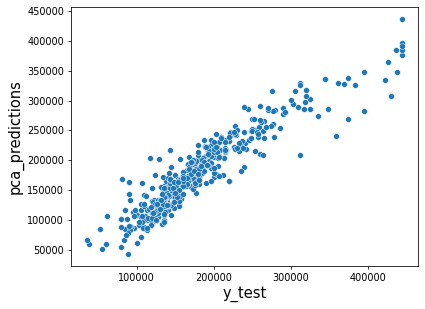

In [148]:
plt.figure(dpi=70)
g=sns.scatterplot(x=y_test,y=pca_predictions)
g.set_xlabel('y_test',fontdict={'size':15})
g.set_ylabel('pca_predictions',fontdict={'size':15})

/Users/obinnadinneya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(0.0, 50.0)

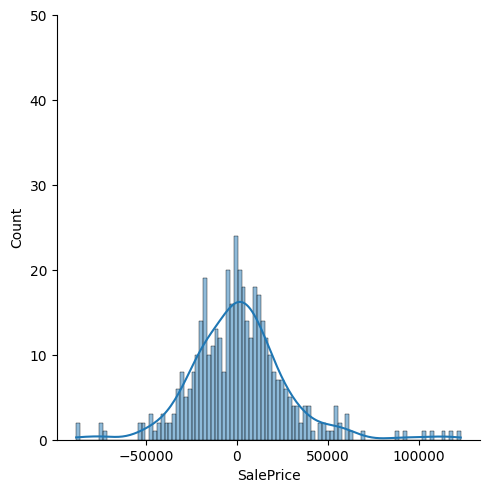

In [149]:
#DISTRIBUTION GRAPH OF RESIDUALS 
sns.displot(y_test-pca_predictions,bins=100,kde=True)
plt.ylim(0.0,50.0)

In [150]:
MAE = metrics.mean_absolute_error(y_test,pca_predictions)

MSE = metrics.mean_squared_error(y_test,pca_predictions)

RMSE = np.sqrt(MSE)

R2 = metrics.r2_score(y_test,pca_predictions)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R^2: {R2}')

MAE: 19136.19970379328
MSE: 728758250.7095541
RMSE: 26995.522790076768
R^2: 0.8679936696503362


#### Using Principle component analysis to compress our numerical columns to two components.This improved our model slightly reducing error and rsquared values.

In [151]:
len(X_test)

426

### USING NEURAL NETWORKS TO PREDICT PRICE

In [169]:
X = dummies_df.drop(columns='SalePrice')
y = dummies_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=101)
    

In [170]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [171]:
#fit scaler to training data
#calcualtes the parameters needed for scaling , hence calculating std dev, min and max 
#we do it to training set only to avoid data leakage.
scaler.fit(X_train)

MinMaxScaler()

In [172]:
#transform training data and test data 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [173]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [174]:
X_train.shape

(994, 91)

### A commonly used "rule of thumb" for deep neural networks is the "sandwich rule.

In [175]:
model = Sequential()
#layers in neural network 3 hidden layers
model.add(Dense(91,activation='relu'))
model.add(Dense(91,activation='relu'))
model.add(Dense(91,activation='relu'))
model.add(Dense(91,activation='relu'))
#output layer one nueron bacoause of what we are trying to predict
#no activation function because we want to predict price
model.add(Dense(1))

In [176]:
#optimize the models gradient descent using the optimizer argument for example the ADAM
model.compile(optimizer='adam',loss='mse')

In [177]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),
          validation_batch_size=128,epochs=400)

Epoch 1/400
32/32 [==============================] - 0s 3ms/step - loss: 38177050624.0000 - val_loss: 39270502400.0000
Epoch 2/400
32/32 [==============================] - 0s 1ms/step - loss: 37945806848.0000 - val_loss: 38375292928.0000
Epoch 3/400
32/32 [==============================] - 0s 1ms/step - loss: 34272419840.0000 - val_loss: 28581406720.0000
Epoch 4/400
32/32 [==============================] - 0s 1ms/step - loss: 16004085760.0000 - val_loss: 4638601728.0000
Epoch 5/400
32/32 [==============================] - 0s 1ms/step - loss: 4149294848.0000 - val_loss: 3546886144.0000
Epoch 6/400
32/32 [==============================] - 0s 1ms/step - loss: 3153702656.0000 - val_loss: 2856995584.0000
Epoch 7/400
32/32 [==============================] - 0s 1ms/step - loss: 2540379136.0000 - val_loss: 2396241152.0000
Epoch 8/400
32/32 [==============================] - 0s 1ms/step - loss: 2124318592.0000 - val_loss: 2094861312.0000
Epoch 9/400
32/32 [==============================] - 0s 1

32/32 [==============================] - 0s 2ms/step - loss: 575836736.0000 - val_loss: 961495424.0000
Epoch 72/400
32/32 [==============================] - 0s 2ms/step - loss: 599859008.0000 - val_loss: 1000210560.0000
Epoch 73/400
32/32 [==============================] - 0s 1ms/step - loss: 574574592.0000 - val_loss: 967041088.0000
Epoch 74/400
32/32 [==============================] - 0s 2ms/step - loss: 573309184.0000 - val_loss: 959796288.0000
Epoch 75/400
32/32 [==============================] - 0s 1ms/step - loss: 563167104.0000 - val_loss: 969578176.0000
Epoch 76/400
32/32 [==============================] - 0s 1ms/step - loss: 563210368.0000 - val_loss: 956626688.0000
Epoch 77/400
32/32 [==============================] - 0s 1ms/step - loss: 582463104.0000 - val_loss: 974010944.0000
Epoch 78/400
32/32 [==============================] - 0s 1ms/step - loss: 561398528.0000 - val_loss: 971051904.0000
Epoch 79/400
32/32 [==============================] - 0s 1ms/step - loss: 554170624.

32/32 [==============================] - 0s 1ms/step - loss: 458891936.0000 - val_loss: 931535424.0000
Epoch 142/400
32/32 [==============================] - 0s 1ms/step - loss: 454753344.0000 - val_loss: 943273984.0000
Epoch 143/400
32/32 [==============================] - 0s 1ms/step - loss: 464041792.0000 - val_loss: 928616256.0000
Epoch 144/400
32/32 [==============================] - 0s 1ms/step - loss: 450203680.0000 - val_loss: 948051136.0000
Epoch 145/400
32/32 [==============================] - 0s 1ms/step - loss: 450428480.0000 - val_loss: 937717312.0000
Epoch 146/400
32/32 [==============================] - 0s 1ms/step - loss: 451608928.0000 - val_loss: 941716736.0000
Epoch 147/400
32/32 [==============================] - 0s 1ms/step - loss: 449905472.0000 - val_loss: 949147264.0000
Epoch 148/400
32/32 [==============================] - 0s 1ms/step - loss: 458837344.0000 - val_loss: 931792640.0000
Epoch 149/400
32/32 [==============================] - 0s 1ms/step - loss: 450

32/32 [==============================] - 0s 1ms/step - loss: 402757984.0000 - val_loss: 1003487296.0000
Epoch 212/400
32/32 [==============================] - 0s 1ms/step - loss: 411598240.0000 - val_loss: 959475200.0000
Epoch 213/400
32/32 [==============================] - 0s 1ms/step - loss: 392101856.0000 - val_loss: 947964160.0000
Epoch 214/400
32/32 [==============================] - 0s 1ms/step - loss: 402716800.0000 - val_loss: 975100672.0000
Epoch 215/400
32/32 [==============================] - 0s 1ms/step - loss: 847301312.0000 - val_loss: 977721280.0000
Epoch 216/400
32/32 [==============================] - 0s 1ms/step - loss: 434076352.0000 - val_loss: 974933312.0000
Epoch 217/400
32/32 [==============================] - 0s 1ms/step - loss: 411210688.0000 - val_loss: 965442432.0000
Epoch 218/400
32/32 [==============================] - 0s 1ms/step - loss: 401313792.0000 - val_loss: 963026432.0000
Epoch 219/400
32/32 [==============================] - 0s 1ms/step - loss: 39

32/32 [==============================] - 0s 1ms/step - loss: 357429472.0000 - val_loss: 982577152.0000
Epoch 282/400
32/32 [==============================] - 0s 1ms/step - loss: 378447072.0000 - val_loss: 973905792.0000
Epoch 283/400
32/32 [==============================] - 0s 1ms/step - loss: 352243840.0000 - val_loss: 977269504.0000
Epoch 284/400
32/32 [==============================] - 0s 1ms/step - loss: 364098112.0000 - val_loss: 997820416.0000
Epoch 285/400
32/32 [==============================] - 0s 1ms/step - loss: 371419616.0000 - val_loss: 985792064.0000
Epoch 286/400
32/32 [==============================] - 0s 1ms/step - loss: 351068480.0000 - val_loss: 988481024.0000
Epoch 287/400
32/32 [==============================] - 0s 1ms/step - loss: 355301312.0000 - val_loss: 991408704.0000
Epoch 288/400
32/32 [==============================] - 0s 1ms/step - loss: 356707840.0000 - val_loss: 983780736.0000
Epoch 289/400
32/32 [==============================] - 0s 1ms/step - loss: 357

Epoch 351/400
32/32 [==============================] - 0s 1ms/step - loss: 321577088.0000 - val_loss: 1035713536.0000
Epoch 352/400
32/32 [==============================] - 0s 1ms/step - loss: 310979072.0000 - val_loss: 1014205696.0000
Epoch 353/400
32/32 [==============================] - 0s 1ms/step - loss: 310193280.0000 - val_loss: 1019500544.0000
Epoch 354/400
32/32 [==============================] - 0s 1ms/step - loss: 319388928.0000 - val_loss: 1041032576.0000
Epoch 355/400
32/32 [==============================] - 0s 1ms/step - loss: 311168000.0000 - val_loss: 1025223936.0000
Epoch 356/400
32/32 [==============================] - 0s 1ms/step - loss: 308771424.0000 - val_loss: 1026402112.0000
Epoch 357/400
32/32 [==============================] - 0s 1ms/step - loss: 304143104.0000 - val_loss: 1030548288.0000
Epoch 358/400
32/32 [==============================] - 0s 1ms/step - loss: 309972256.0000 - val_loss: 1024283584.0000
Epoch 359/400
32/32 [==============================] - 0

<Axes: >

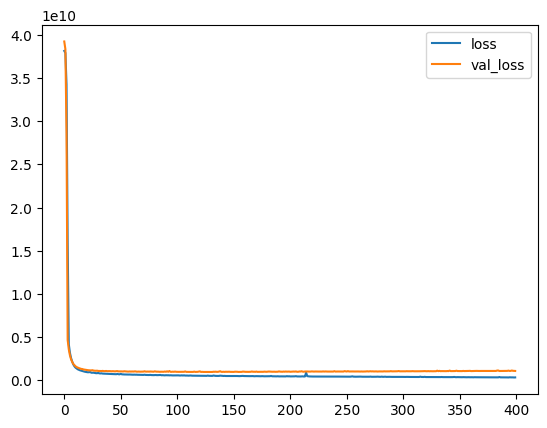

In [178]:
loss_df = pd.DataFrame(model.history.history)
#to determine the amount of epochs needed for minimum loss and to see if model overfits
loss_df.plot()

In [181]:
test_predictions = model.predict(X_test)

14/14 [==============================] - 0s 521us/step


In [182]:
test_predictions

array([[117494.93 ],
       [108519.69 ],
       [227095.94 ],
       [127182.56 ],
       [121723.65 ],
       [120439.99 ],
       [124107.164],
       [115119.76 ],
       [208785.77 ],
       [203664.78 ],
       [237625.44 ],
       [217970.77 ],
       [167446.25 ],
       [128683.78 ],
       [186575.98 ],
       [173934.83 ],
       [120993.69 ],
       [146762.73 ],
       [157167.14 ],
       [150843.   ],
       [168483.1  ],
       [205927.62 ],
       [117622.766],
       [185404.88 ],
       [154163.88 ],
       [118171.086],
       [270270.06 ],
       [143227.72 ],
       [171062.88 ],
       [119008.78 ],
       [131779.56 ],
       [161695.16 ],
       [196230.42 ],
       [301019.2  ],
       [133069.64 ],
       [199796.25 ],
       [115860.13 ],
       [168511.89 ],
       [172866.39 ],
       [175456.4  ],
       [127524.7  ],
       [148556.17 ],
       [162850.75 ],
       [172170.52 ],
       [230353.53 ],
       [136277.92 ],
       [118807.36 ],
       [20514

In [183]:
test_predictions = pd.DataFrame(test_predictions)

pred_df = pd.DataFrame(y_test.values,columns=['Test True Y'])

pred_df = pd.concat([pred_df,test_predictions],axis=1)

pred_df.columns = ['Test True Y', 'Model Predictions']

pred_df.head(10)

,Test True Y,Model Predictions
0,139000.0,117494.929688
1,112000.0,108519.687500
2,227875.0,227095.937500
3,90000.0,127182.562500
4,115000.0,121723.648438
5,135900.0,120439.992188
6,116000.0,124107.164062
7,124000.0,115119.757812
8,190000.0,208785.765625
9,164000.0,203664.781250


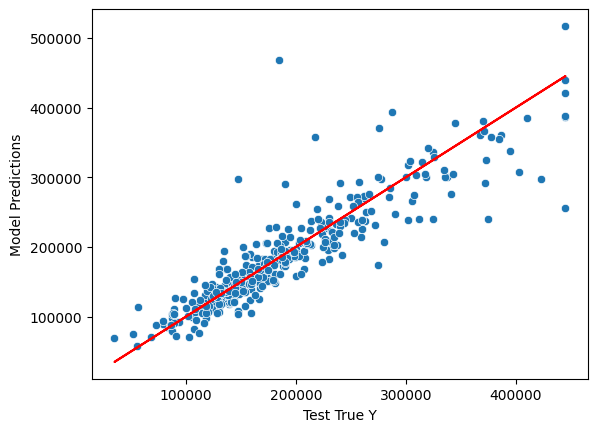

In [190]:
##lets plot the predictions to the original y values
sns.scatterplot(x='Test True Y', y= 'Model Predictions',data=pred_df)

#adding in the line that would represent perfect prediction
plt.plot(y_test,y_test,'r')

In [185]:
MAE = metrics.mean_absolute_error(y_test,test_predictions)
MSE = metrics.mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test,test_predictions)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R^2: {R2}')

MAE: 19065.656156836852
MSE: 1036833333.1545602
RMSE: 32199.89647738887
R^2: 0.8118789784633433


In [121]:
#We still see that the Linear regression model perfroms best at predicting the house 
#prices with the lowest error, Although models can be fine tuned to perform better

In [186]:
housing_df['SalePrice'].describe().T

count      1420.000000
mean     181695.169824
std       74205.009474
min       34900.000000
25%      131500.000000
50%      165000.000000
75%      215000.000000
max      445071.410000
Name: SalePrice, dtype: float64

In [189]:
percent_error_off = (19065.656156836852/181695.169824)*100
percent_error_off

10.493210235200474

- Conclusion model does not overfit and is good at predicting lower prices but when 
it comes to the more exoensive properties it gets worse at doing so. 
- so an idea would be to creat a cut off margin for the model to only predict house prices
within a certain range